<span style="font-size:24px;">Import Necessary Libraries.</span>


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import TimestampedGeoJson

# Load the CSV file
data = pd.read_csv('v6.csv')


<span style="font-size:24px;">Alerts Count based on Time.</span>


c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

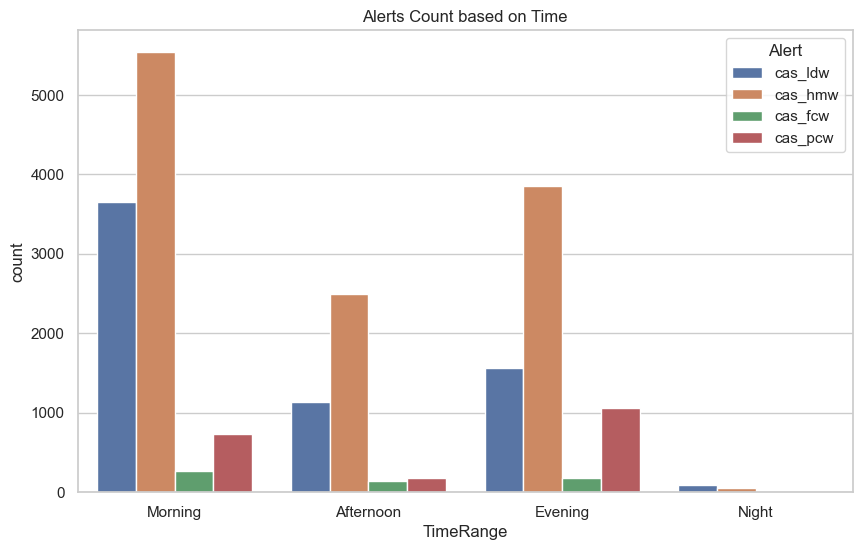

In [25]:
# Load the CSV file
data = pd.read_csv('v6.csv')

# Countplot of Alerts based on Time
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='TimeRange', hue='Alert')
plt.title('Alerts Count based on Time')
plt.show()


Based on time ranges of morning afternoon evening and night 
in morning afternoon evening hmw is the alert having most alerts 
followed by ldw and then pcw and at least of fcw 
but in case of night the ldw is slightly higher than hmw


<span style="font-size:24px;">Alert Types VS Speed VS time_range Per Alert Diffrent Plot.</span>


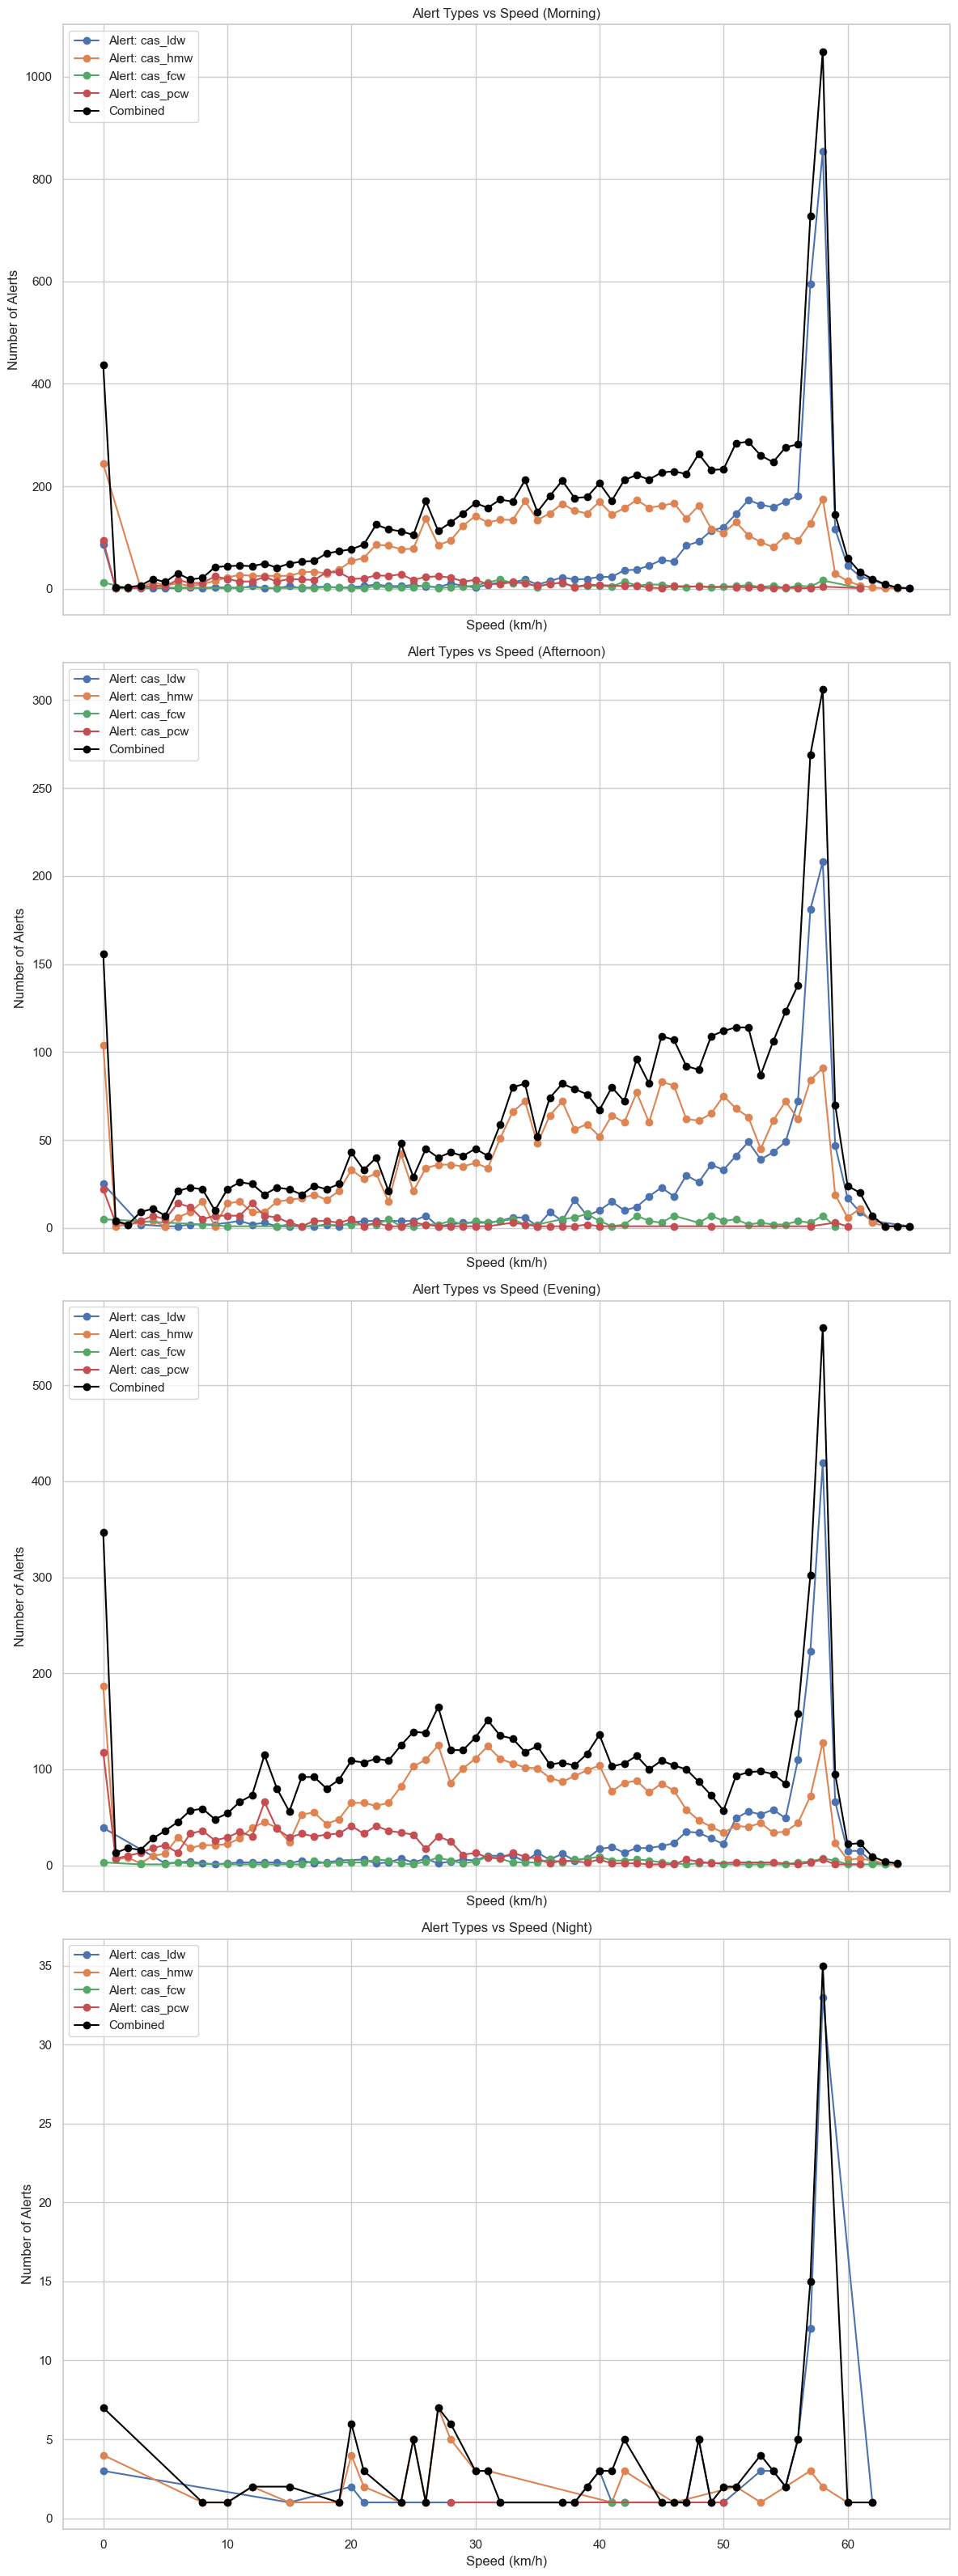

In [26]:
    # Load the CSV file
    data = pd.read_csv('v6.csv')

    # Per Alert
    data['Time'] = pd.to_datetime(data['Time'])

    # Create a list of unique alert types
    alert_types = data['Alert'].unique()

    # Create a list of unique time ranges
    time_ranges = data['TimeRange'].unique()

    # Create subplots for each time range
    num_time_ranges = len(time_ranges)
    fig, axes = plt.subplots(nrows=num_time_ranges, ncols=1, figsize=(12, 8*num_time_ranges), sharex=True)

    for i, time_range in enumerate(time_ranges):
        # Filter data for the specific time range
        time_range_data = data[data['TimeRange'] == time_range]
        
        # Plot alert types vs speed for the current time range
        ax = axes[i]
        ax.set_title(f'Alert Types vs Speed ({time_range})')
        
        for alert_type in alert_types:
            alert_data = time_range_data[time_range_data['Alert'] == alert_type]
            alerts_vs_speed = alert_data.groupby('Speed')['Alert'].count()
            ax.plot(alerts_vs_speed.index, alerts_vs_speed.values, marker='o', label=f'Alert: {alert_type}')
        
        total_alerts_by_speed = time_range_data.groupby('Speed')['Alert'].count()
        ax.plot(total_alerts_by_speed.index, total_alerts_by_speed.values, marker='o', label='Combined', color='black')
        
        # Customize subplot
        ax.set_xlabel('Speed (km/h)')
        ax.set_ylabel('Number of Alerts')
        ax.legend()
        ax.grid(True)

    # Adjust layout and display the subplots
    plt.tight_layout()
    plt.show()


MORNING
HMW
Based on the speed , time range and alert type 
in case of morning the alert hmw is equaly distributed over the speed range of 20 to 60
but in speed range of 55 to 60 the alert count is increased 
also at the speed of 0 the alert hmw is most occuring in the morning 

LDW
in the case of ldw the alert ldw is negligiable on the speeds of range 0 to 40 km per hour 
alerts are gradually increasing from speeds of 40 to 55
most number of alerts are being generated at the speed of 55 to 60 km/hr range (there is a huge peak in the graph)

FCW 
negligiable amountof alerts are generated at all speeds 

PCW
around speed of 10 to 30 km/hr some alerts are beinng generated

AFTERNOON
PCW
most are around speed of 5-20 kmhr later on the alerts are very less alerts are beeing generated

FCW
negligible amount of alerts are generated till 0 to 35 kmph
after 35 to 50 mild alerts are being generated 

HMW
negligiable around speed of 0 to 5 kmph
random during all the speeds and gradually increasing with respect to speed 
maximum alerts are generated around speeds of 50 to 60 kmph
average no of alerts are generated aurund 30 to 50 kmph

LDW
negligiable amount of alerts are generated timm speed of 0 to 35 kmph
from 35 to 60 gradually increasing with time 
there is a spike in a graph of Alert Types VS Speed VS time_range Per Alert the highest spike is at speed range of 55 to 60

EVENING 
PCW
most are around speed of 5-20 kmhr later on the alerts are very less alerts are beeing generated

FCW
negligible amount of alerts are generated till 0 to 35 kmph
after 35 to 50 mild alerts are being generated 

HMW
negligiable around speed of 0 to 5 kmph
random during all the speeds and gradually increasing with respect to speed 
maximum alerts are generated around speeds of 50 to 60 kmph
average no of alerts are generated aurund 30 to 50 kmph

LDW
negligiable amount of alerts are generated timm speed of 0 to 35 kmph
from 35 to 60 gradually increasing with time 
there is a spike in a graph of Alert Types VS Speed VS time_range Per Alert the highest spike is at speed range of 55 to 60

NIGHT
Very less data is present of the time range of night
PCW
negligiable at all speeds and some alerts are being generated at speeds of 25 to 30 kmph

FCW
negligiable at all speeds and some alerts are being generated at speeds of 40 to 45 kmph

HMW
all the alerts are randomly distributed among all speeds the data is very in consistent 
there are 2 spikes in graph at speed of 20- 30kmph
and speed of 55 to 60kmph

LDW
Negligiable amount of alerts around all speeds 
some at arount 20, 40 ,50 to 55
and at speed range of 55 to 60 a huge spike is at count of alerts 



in all time ranges the alerts are significantly most occured at 0 speeds
 and in case of ldw the most alerts are at speed range of 55 to 60 kmph



<span style="font-size:24px;">Alert Type vs Time Range, Safe Speed And Danger Speed EXCEL .</span>

In [27]:
import pandas as pd

# Load CSV data into a Pandas DataFrame
data = pd.read_csv("v6.csv")

# Parse datetime
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Group by alert type and time range
grouped = data.groupby(['Alert', 'TimeRange'])

# Create a list to hold the results
results = []

# Calculate safe and danger speeds for each group
for (alert, time_range), group in grouped:
    speed_distribution = group['Speed']
    safe_speed_threshold = speed_distribution.mean()  # You can customize this based on your analysis
    danger_speed_threshold = speed_distribution.quantile(0.9)  # Adjust the quantile value as needed

    results.append({
        'Alert': alert,
        'TimeRange': time_range,
        'Safe Speed Threshold (km/h)': safe_speed_threshold,
        'Danger Speed Threshold (km/h)': danger_speed_threshold
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Save the results to an Excel file
# Save the results to a CSV file
results_df.to_csv('speed_thresholds.csv', index=False)



C:\Users\amanr\AppData\Local\Temp\ipykernel_11168\2574262452.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])



<span style="font-size:24px;"> Visualizing Speed Thresholds and Alert Counts by Time Range.</span>

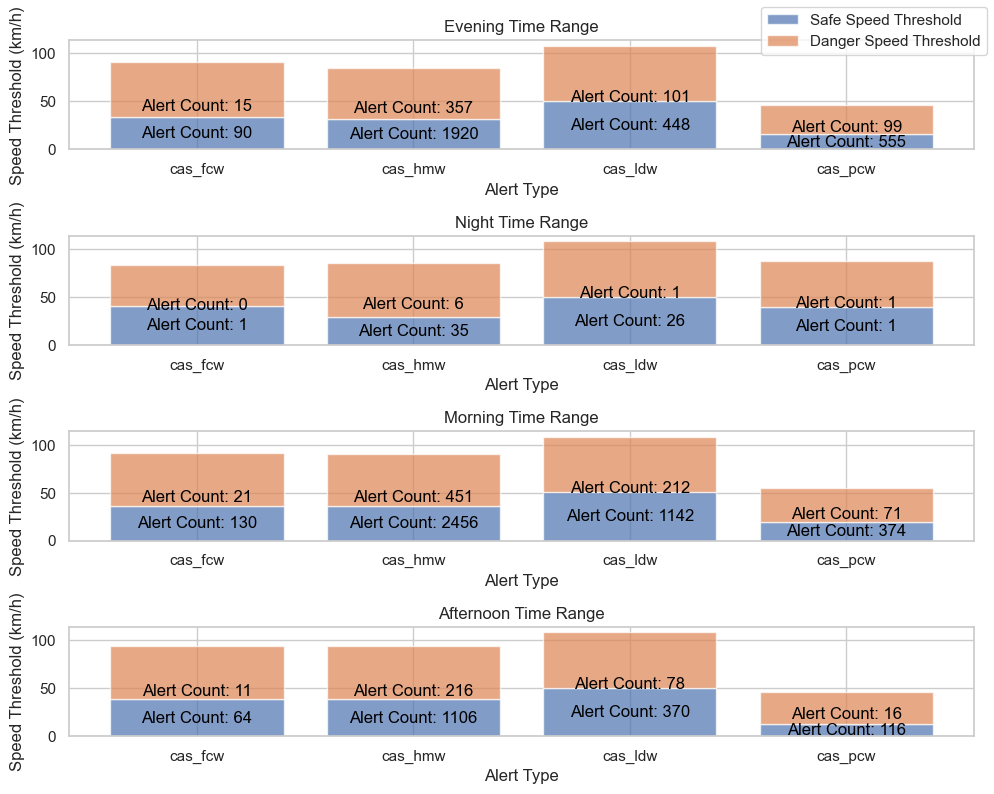

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = [
    ("Afternoon", "cas_fcw", 38, 56),
    ("Evening", "cas_fcw", 34, 57),
    ("Morning", "cas_fcw", 36, 56),
    ("Night", "cas_fcw", 41, 42),
    ("Afternoon", "cas_hmw", 38, 56),
    ("Evening", "cas_hmw", 32, 53),
    ("Morning", "cas_hmw", 36, 55),
    ("Night", "cas_hmw", 29, 56),
    ("Afternoon", "cas_ldw", 50, 58),
    ("Evening", "cas_ldw", 50, 58),
    ("Morning", "cas_ldw", 51, 58),
    ("Night", "cas_ldw", 50, 58),
    ("Afternoon", "cas_pcw", 13, 33),
    ("Evening", "cas_pcw", 16, 30),
    ("Morning", "cas_pcw", 19, 36),
    ("Night", "cas_pcw", 39, 48)
]

# Load the alert count data from v6.csv
count_data = pd.read_csv("v6.csv")

# Separate data by time range
time_ranges = set(item[0] for item in data)

# Create subplots for each time range
fig, axs = plt.subplots(len(time_ranges), figsize=(10, 8))

# Initialize a dictionary to store legend handles and labels
legend_handles_labels = {}

for i, time_range in enumerate(time_ranges):
    filtered_data = [(alert, safe_speed, danger_speed) for tr, alert, safe_speed, danger_speed in data if tr == time_range]
    alerts = [item[0] for item in filtered_data]
    safe_speed = [item[1] for item in filtered_data]
    danger_speed = [item[2] for item in filtered_data]

    # Filter the count data for the current time range
    count_data_filtered = count_data[count_data["TimeRange"] == time_range]

    # Initialize lists to store alert counts for safe and danger speed thresholds
    safe_counts = []
    danger_counts = []

    # Calculate the alert counts for each alert that falls within the safe and danger speed thresholds
    for alert in alerts:
        safe_count = len(count_data_filtered[(count_data_filtered["Alert"] == alert) & (count_data_filtered["Speed"] <= safe_speed[alerts.index(alert)])])
        danger_count = len(count_data_filtered[(count_data_filtered["Alert"] == alert) & (count_data_filtered["Speed"] > danger_speed[alerts.index(alert)])])
        safe_counts.append(safe_count)
        danger_counts.append(danger_count)

    bar_width = 0.35
    x = np.arange(len(alerts))

    axs[i].bar(alerts, safe_speed, label='Safe Speed Threshold', alpha=0.7)
    axs[i].bar(alerts, danger_speed, bottom=safe_speed, label='Danger Speed Threshold', alpha=0.7)

    axs[i].set_title(f"{time_range} Time Range")
    axs[i].set_xlabel("Alert Type")
    axs[i].set_ylabel("Speed Threshold (km/h)")

    # Add text labels for alert counts above the danger speed threshold (black text, centered)
    for j, alert in enumerate(alerts):
        axs[i].text(x[j], safe_speed[j] + (danger_speed[j] - safe_speed[j]) / 2, f"Alert Count: {danger_counts[j]}", ha='center', va='center', color='black')

    # Add text labels for alert counts below the safe speed threshold (black text, centered)
    for j, alert in enumerate(alerts):
        axs[i].text(x[j], safe_speed[j] / 2, f"Alert Count: {safe_counts[j]}", ha='center', va='center', color='black')

    # Create legend handles and labels for this subplot
    handles, labels = axs[i].get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        if label not in legend_handles_labels:
            legend_handles_labels[label] = handle

# Create a common legend outside of the subplots
fig.legend(legend_handles_labels.values(), legend_handles_labels.keys(), loc='upper right')

plt.tight_layout()
plt.show()



<span style="font-size:24px;">Visualizing Alert Counts vs. Speed Thresholds by Time Range .</span>

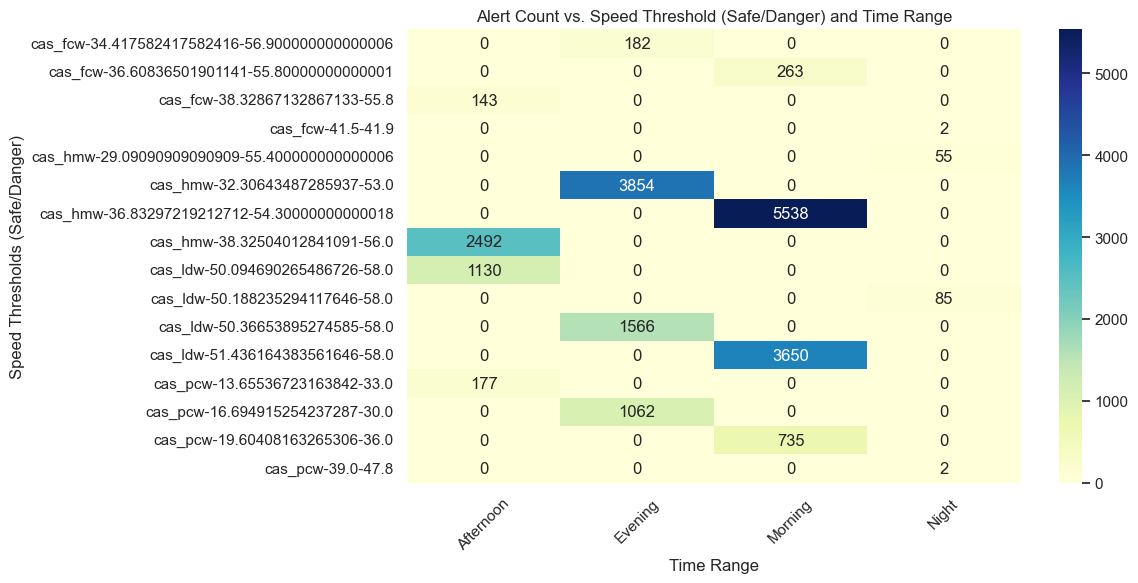

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV files
alert_df = pd.read_csv("v6.csv")
speed_threshold_df = pd.read_csv("Speed_thresholds.csv")

# Merge the data based on 'Alert Type' and 'Time Range'
merged_df = pd.merge(alert_df, speed_threshold_df, on=['Alert', 'TimeRange'])

# Create a pivot table to get the alert count for each combination
pivot_table = merged_df.pivot_table(values='Vehicle', 
                                    index=['Alert', 'Safe Speed Threshold (km/h)', 'Danger Speed Threshold (km/h)'], 
                                    columns='TimeRange', 
                                    aggfunc='count', 
                                    fill_value=0)

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.heatmap(data=pivot_table, cmap="YlGnBu", annot=True, fmt='d', cbar=True)
plt.title('Alert Count vs. Speed Threshold (Safe/Danger) and Time Range')
plt.xlabel('Time Range')
plt.ylabel('Speed Thresholds (Safe/Danger)')
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()



<span style="font-size:24px;">Comparison of Safe and Danger Speed Thresholds by Time Range and Alert Type .</span>

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

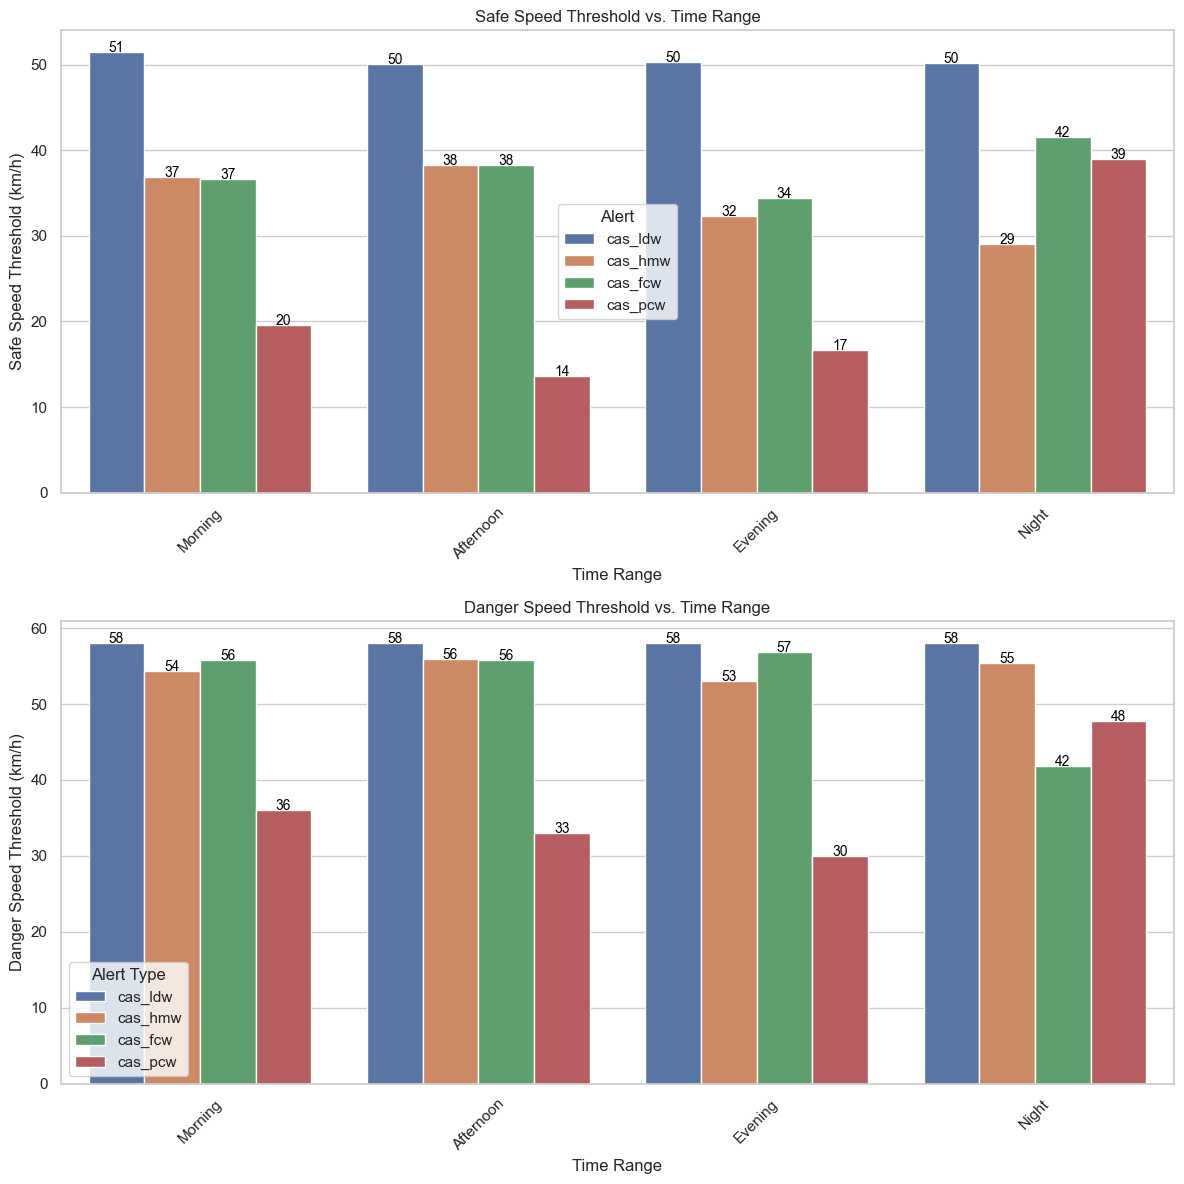

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV files
alert_df = pd.read_csv("v6.csv")
speed_threshold_df = pd.read_csv("Speed_thresholds.csv")

# Merge the data based on 'Alert Type' and 'Time Range'
merged_df = pd.merge(alert_df, speed_threshold_df, on=['Alert', 'TimeRange'])

# Create subplots for Safe Speed Threshold and Danger Speed Threshold
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
sns.set(style="whitegrid")

# Bar plot for Safe Speed Threshold
ax1 = sns.barplot(data=merged_df, x='TimeRange', y='Safe Speed Threshold (km/h)', hue='Alert', ax=axes[0])
ax1.set_title('Safe Speed Threshold vs. Time Range')
ax1.set_xlabel('Time Range')
ax1.set_ylabel('Safe Speed Threshold (km/h)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Alert')

# Add Alert count labels to the bars
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=10, color='black')

# Bar plot for Danger Speed Threshold
ax2 = sns.barplot(data=merged_df, x='TimeRange', y='Danger Speed Threshold (km/h)', hue='Alert', ax=axes[1])
ax2.set_title('Danger Speed Threshold vs. Time Range')
ax2.set_xlabel('Time Range')
ax2.set_ylabel('Danger Speed Threshold (km/h)')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Alert Type')

# Add Alert count labels to the bars
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=10, color='black')

plt.tight_layout()

# Show the plots
plt.show()


<span style="font-size:24px;">Analyzing and Visualizing Traffic Incident Clusters with Approximate Circles and Density Heatmap.</span>

In [31]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from shapely.geometry import MultiPoint

# Read the CSV data
data = pd.read_csv('v6.csv')

# Filter data for the specific alerts
alerts = ['cas_fcw', 'cas_hmw', 'cas_pcw', 'cas_ldw']

# Apply KMeans clustering
num_clusters = 15  # You can adjust this value

# Process each alert separately
for alert in alerts:
    alert_data = data[data['Alert'] == alert]
    
    if alert_data.empty:
        continue

    # Create a Folium map centered at a specific location
    m = folium.Map(location=[alert_data['Lat'].mean(), alert_data['Long'].mean()], zoom_start=10)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(alert_data[['Lat', 'Long']])

    # Get cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    # Group by cluster and alert
    alert_data_copy = alert_data.copy()  # Create a copy to avoid SettingWithCopyWarning
    alert_data_copy['Cluster'] = cluster_labels
    grouped = alert_data_copy.groupby(['Cluster', 'Alert'])

    max_density_cluster = None
    max_density = -1  # Initialize with a negative value

    # Calculate safe and danger speeds for each cluster and alert
    for (cluster, _), group in grouped:
        cluster_center = cluster_centers[cluster]
        popup_text = f"<b>Cluster: {cluster}</b><br>"
        
        # Add the number of data points in the cluster to the pop-up text
        popup_text += f"Number of Data Points: {len(group)}<br><br>"
        
        # Calculate safe and danger speeds rounded to 2 decimal places
        speed_distribution = group['Speed']
        safe_speed_threshold = round(speed_distribution.mean())  # Round to the nearest integer
        danger_speed_threshold = round(speed_distribution.quantile(0.9))  # Round to the nearest integer

        # Get unique time ranges in the cluster
        unique_time_ranges = group['TimeRange'].unique()
        
        # Add time range and speed info to popup
        for time_range in unique_time_ranges:
            time_range_group = group[group['TimeRange'] == time_range]
            popup_text += f"Time Range: {time_range}<br>"
            popup_text += f"Safe Speed: {safe_speed_threshold} km/h<br>"
            popup_text += f"Danger Speed: {danger_speed_threshold} km/h<br><br>"

        # Find the farthest data point in the cluster to calculate the radius of the circle
        distances = cdist([[cluster_center[0], cluster_center[1]]], group[['Lat', 'Long']])
        max_distance_idx = distances.argmax()
        farthest_data_point = group.iloc[max_distance_idx]
        radius = cdist([[cluster_center[0], cluster_center[1]]], [[farthest_data_point['Lat'], farthest_data_point['Long']]])[0][0]

        # Create a circle with the calculated radius around the cluster center
        folium.Circle(
            location=[cluster_center[0], cluster_center[1]],
            radius=radius * 100000,  # Multiply by a factor for better visibility
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.2,
        ).add_to(m)

        # Find the nearest data point to the cluster center
        nearest_data_point_idx = distances.argmin()
        nearest_data_point = group.iloc[nearest_data_point_idx]

        # Calculate cluster density
        cluster_density = len(group) / (3.14159265358979323846 * (radius ** 2))

        # Check if this cluster has a higher density than the previous maximum
        if cluster_density > max_density:
            max_density = cluster_density
            max_density_cluster = cluster

        folium.Marker(
            location=[nearest_data_point['Lat'], nearest_data_point['Long']],  # Use the nearest data point
            popup=folium.Popup(popup_text, parse_html=True),
            icon=folium.Icon(color='black', icon='info-sign')
        ).add_to(m)

    # Add marker cluster for zoom in and out functionality
    marker_cluster = MarkerCluster().add_to(m)

    # Iterate through individual data points and add them to marker cluster
    for _, row in alert_data.iterrows():
        folium.Marker(
            location=[row['Lat'], row['Long']],
            icon=None,  # Set the icon to None for individual data points
        ).add_to(marker_cluster)

    # Highlight the cluster with the maximum density as a black spot
    if max_density_cluster is not None:
        max_density_cluster_data = alert_data_copy[alert_data_copy['Cluster'] == max_density_cluster]
        max_density_cluster_points = [[row['Lat'], row['Long']] for _, row in max_density_cluster_data.iterrows()]
        HeatMap(max_density_cluster_points, radius=25, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'red'}).add_to(m)

    # Calculate the density of incidents in each cluster and visualize it as a heatmap
    heatmap_data = [[row['Lat'], row['Long']] for _, row in alert_data.iterrows()]
    HeatMap(heatmap_data, radius=25).add_to(m)

    # Save the map to an HTML file
    m.save(f'{alert}_with_approximate_circles.html')


c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of


<span style="font-size:24px;">Analyzing and Visualizing Traffic Incident Clusters with Alert Details.</span>

In [33]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Read the CSV data
data = pd.read_csv('v6.csv')

# Filter data for the specific alerts
alerts = ['cas_fcw', 'cas_hmw', 'cas_pcw', 'cas_ldw']

# Apply KMeans clustering
num_clusters = 8  # You can adjust this value

# Create a Folium map centered at a specific location
map_center = [data['Lat'].mean(), data['Long'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Initialize a dictionary to store cluster information
cluster_info = {}

# Process each alert separately and combine clusters
for alert in alerts:
    alert_data = data[data['Alert'] == alert]

    if alert_data.empty:
        continue

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(alert_data[['Lat', 'Long']])

    # Get cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    # Group by cluster
    alert_data_copy = alert_data.copy()  # Create a copy to avoid SettingWithCopyWarning
    alert_data_copy['Cluster'] = cluster_labels

    for cluster_id in range(num_clusters):
        cluster_data = alert_data_copy[alert_data_copy['Cluster'] == cluster_id]

        if cluster_id not in cluster_info:
            cluster_info[cluster_id] = {
                'center': cluster_centers[cluster_id],
                'alerts': {}  # Dictionary to store alert counts
            }

        cluster_info[cluster_id]['alerts'][alert] = {
            'count': len(cluster_data),
            'safe_speed': cluster_data['Speed'].mean(),
            'danger_speed': cluster_data['Speed'].quantile(0.9)
        }

# Create markers for each cluster
for cluster_id, info in cluster_info.items():
    cluster_center = info['center']
    total_alerts_in_cluster = sum(alert_info['count'] for alert_info in info['alerts'].values())

    # Find the nearest data point on the road for the cluster center
    distances = cdist([[cluster_center[0], cluster_center[1]]], data[['Lat', 'Long']])
    nearest_data_point_idx = distances.argmin()
    nearest_data_point = data.iloc[nearest_data_point_idx]

    # Adjust the cluster center to the nearest data point on the road
    cluster_center = [nearest_data_point['Lat'], nearest_data_point['Long']]

    popup_text = f"Cluster: {cluster_id}\n"

    # Add latitude and longitude information
    popup_text += f"\nLatitude: {cluster_center[0]:.6f}"
    popup_text += f"\nLongitude: {cluster_center[1]:.6f}"

    # Add total alerts in the cluster to the popup text
    popup_text += f"\nTotal Alerts: {total_alerts_in_cluster}"

    # Calculate and add alert percentages to the popup text
    for alert, alert_info in info['alerts'].items():
        alert_percentage = (alert_info['count'] / total_alerts_in_cluster) * 100
        popup_text += f"\n{alert} Percentage: {alert_percentage:.2f}%"

        # Add safe and danger speed information to the popup text
        popup_text += f"\nSafe Speed: {alert_info['safe_speed']:.2f} km/h"
        popup_text += f"\nDanger Speed: {alert_info['danger_speed']:.2f} km/h"

    # Calculate average safe and danger speeds based on alert percentages
    average_safe_speed = round(sum(alert_info['safe_speed'] * (alert_info['count'] / total_alerts_in_cluster) for alert_info in info['alerts'].values()), 2)
    average_danger_speed = round(sum(alert_info['danger_speed'] * (alert_info['count'] / total_alerts_in_cluster) for alert_info in info['alerts'].values()), 2)

    popup_text += f"\nAverage Safe Speed: {average_safe_speed} km/h"
    popup_text += f"\nAverage Danger Speed: {average_danger_speed} km/h"

    folium.Marker(
        location=[cluster_center[0], cluster_center[1]],
        popup=folium.Popup(popup_text, parse_html=True),
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(m)

    # Draw a circular boundary for the cluster's data points
    folium.Circle(
        location=cluster_center,
        radius=2500,  # Adjust the radius as needed (in meters)
        color='blue',  # Customize the boundary color
        fill=True,
        fill_color='blue',  # Customize the fill color
        fill_opacity=0.2,
    ).add_to(m)

# Add marker cluster for zoom in and out functionality
marker_cluster = MarkerCluster().add_to(m)

# Iterate through individual data points and add them to marker cluster
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        icon=None,  # Set the icon to None for individual data points
    ).add_to(marker_cluster)

# Calculate the density of incidents in each cluster and visualize it as a heatmap
heatmap_data = [[row['Lat'], row['Long']] for _, row in data.iterrows()]
HeatMap(heatmap_data, radius=16).add_to(m)

# Save the map to an HTML file
m.save('index.html')


c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of